# Dynamics Homework 2

Liam Dubay

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 4*np.pi**2 # solar system units

In [24]:
class Binary:
    def __init__(self, mass1, mass2, separation, phase=0):
        self.m1 = mass1
        self.m2 = mass2
        self.a = separation
        # Define orbital phase at 0 with m1 on the positive x-axis
        self.phi0 = phase
        self.T = np.sqrt(self.a**3/(self.m1 + self.m2))
        
    def acceleration(self, t, test_position):
        """
        Gravitational acceleration on a test particle due to the binary.
        """
        pos1, pos2 = self.positions(t)
        r1 = test_position - pos1
        r2 = test_position - pos2
        accel = -G * (self.m1 * r1 / np.sqrt(np.sum(r1**2))**3 + self.m2 * r2 / np.sqrt(np.sum(r2**2))**3)
        return accel
    
    def positions(self, t):
        """
        Cartesian positions of the two masses as a function of time.
        """
        # Orbital phase of the primary, m1
        phi = 2*np.pi/self.T * t + self.phi0
        # Keep phase < 2pi
        phi = phi - 2*np.pi * np.floor(phi / (2*np.pi))
        # Cartesian positions of m1 and m2
        pos1 = self.a/2 * np.array([np.cos(phi), np.sin(phi)])
        pos2 = self.a/2 * np.array([np.cos(phi+np.pi), np.sin(phi+np.pi)])
        return pos1, pos2
        
    def potential(self, t, test_position):
        """
        Gravitational potential of a test particle at a given position and time.
        """
        pos1, pos2 = self.positions(t)
        r1 = np.sqrt(np.sum((test_position - pos1)**2))
        r2 = np.sqrt(np.sum((test_position - pos2)**2))
        pot = -G * (self.m1 / r1 + self.m2 / r2)
        return pot

0.5773502691896257


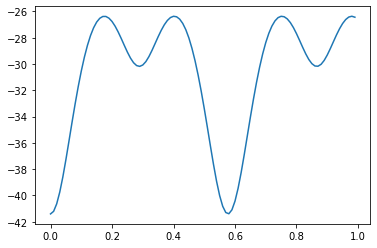

In [30]:
# Test code for binary star
binary = Binary(1, 1, 2, phase=0)
print(binary.T)
test_pos = np.array([2, 0])
tarr = np.arange(0, 2, 0.01)
plt.plot(tarr, [binary.acceleration(t, test_pos)[0] for t in tarr])

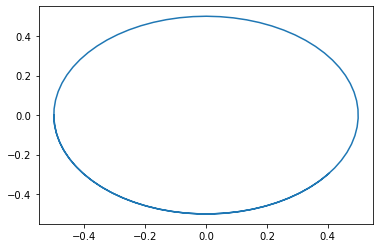

In [28]:
plt.plot(binary.positions(tarr)[0][0], binary.positions(tarr)[0][1])